
Haifa azrelli 3DNI1


# <center> <font color=pink> 2éme Compte rendu: segmentation </font></center>

K-means (k-moyennes) est un  algorithme non supervisé  de clustering,il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster.Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance).Une même observation, ne pourra donc, appartenir à deux clusters différents


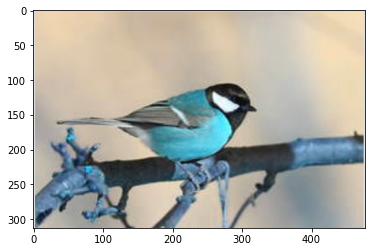

In [7]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt


image = cv2.imread('oiseau.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters =5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('oiseau5.jpg', quant)
plt.imshow(image)

cv2.imread('oiseau.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

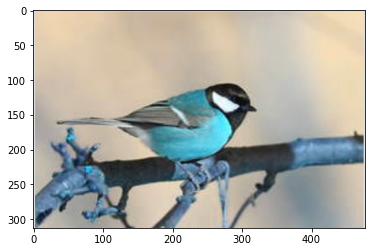

In [8]:
plt.imshow(image)

<h2><font color='#990033'>Choisir K : le nombre de clusters</font></h2> 
le nombre de cluster K n’est pas forcément fixé.En changeant le nombre de clusters l'image va etre segmentée en k segments



on remarque que le nombre de cluster fait la segmentation  de l'image en k regions .

Une stratégie simple pour identifier le nombre de classes consiste à faire varier
K et surveiller l’évolution de l''image et on sauvegarde chaque nombre de clusters dans une nouvelle image pour distinguer la difference .

on remarque que l'algoithme distingue les couleurs et fait la séparation les clusters en regroupe en des régions selon le nombre de clusters fixé manuellemnet.  

plus le nombre de clusters augmente on rapproche plus a l'image originale.

mais si on augmente le nombre K et depasse 10 , l''image va etre detorirée.

le nombre de clusters depend du domaine et du contexte dans lequel on ava utiliser l'image

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def segm(k):
  
    image= cv2.imread('oiseau.jpg')

    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))


    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    cv2.imwrite('oisau2.jpg', quant)
    plt.imshow(image)

    cv2.imread('oiseau.jpg')
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [15]:
interact(segm,k=widgets.IntSlider(min=2, max=10, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=10, min=2), Output()), _dom_classes=('widget-int…

<h2 style="color:red;">Conclusion</h2>

Pour un même jeu de données, il n’existe pas un unique clustering possible. La difficulté résidera donc à choisir un nombre de cluster K qui permettra de mettre en lumière des patterns intéressants entre les données. Malheureusement il n’existe pas de procédé automatisé pour trouver le bon nombre de clusters.


<h2><font color='#330066'>Ajouter du bruit </font></h2> 

Dans cette section on va ajouter 7 types de bruit:</br>
Bruit additif gaussien «gaussien».</br>
Bruit additif gaussien «localvar» avec une variance locale spécifique par point.</br>
Bruit de distribution de Poisson «poisson».</br>
Bruit de sel «sel», remplaçant aléatoirement les pixels par 1. Appartient à un bruit gris élevé.</br>
«Pepper» Le bruit de poivre, remplaçant aléatoirement les pixels par 0 ou -1, est un faible bruit gris.</br>
«S & p» Bruit de sel et de poivre, deux types de bruit apparaissent en même temps, montrant un bruit noir et blanc.</br>
«Speckle» utilise un bruit de multiplication pour out = image + n * images, où n est un bruit uniforme avec une moyenne et une variance spécifiées </br>
afin de voir leur impact sur l'image et c'est utile pour tester les filtres  destinés à réduire le bruit. Ce code montre comment générer des images affectées par les bruit .

In [2]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="oiseau.jpg"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="oiseau.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt","Pepper","S&p","speckle"]);
plt.show()

<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt', 'Pepper…

<h2><font color='#330066'>Débruiter les images</font></h2> 

dans cette section on va éliminer la bruit puis on fait la segmentation de chaque image avec des méthodes variées

#### la méthode fastNlMeansDenoisingColored

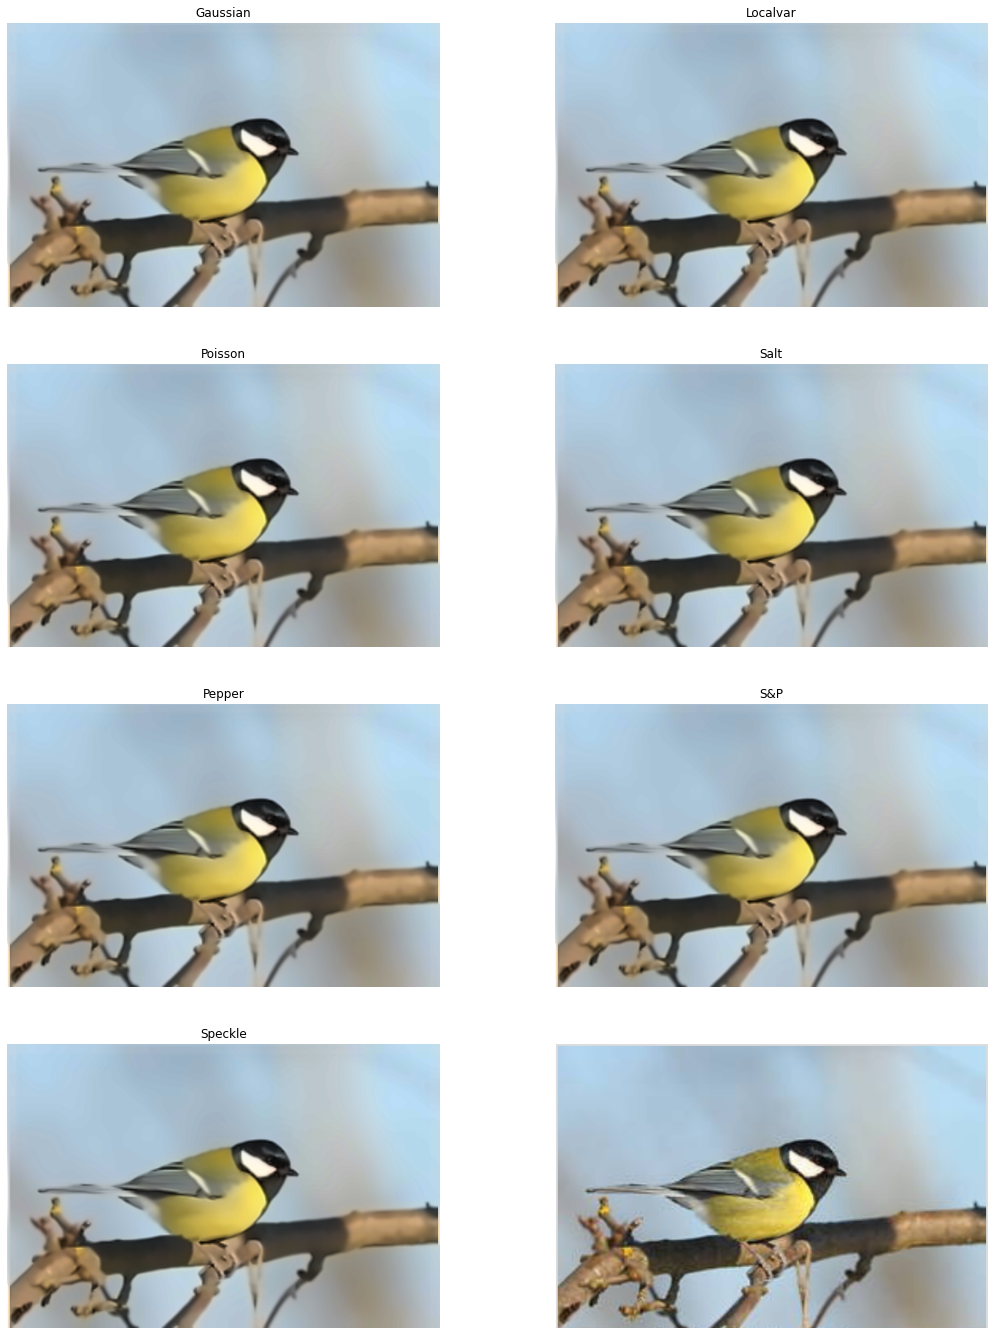

In [26]:
images = cv2.imread('oiseau.jpg')
b,g,r = cv2.split(images)          
rgb_img = cv2.merge([r,g,b])

def plotdenoising(rgb_img, mode, b, g, r):
    plt.subplot(b,g,r)
    if mode is not None:
        dst = cv2.fastNlMeansDenoisingColored(rgb_img,None,10,10,7,21)        
        plt.imshow(dst)
        b,g,r = cv2.split(dst)      
        
        
    if mode is None:
        plt.imshow(rgb_img)
    plt.title(mode)
    plt.axis("off")     

plt.figure(figsize=(18,24))
b=4
g=2
plotdenoising( rgb_img , "Gaussian", b,g,1)
plotdenoising(rgb_img , "Localvar", b,g,2)
plotdenoising( rgb_img , "Poisson", b,g,3)
plotdenoising( rgb_img , "Salt", b,g,4)
plotdenoising( rgb_img , "Pepper", b,g,5)
plotdenoising( rgb_img , "S&P", b,g,6)
plotdenoising( rgb_img , "Speckle", b,g,7)
plotdenoising(rgb_img , None, b,g,8)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


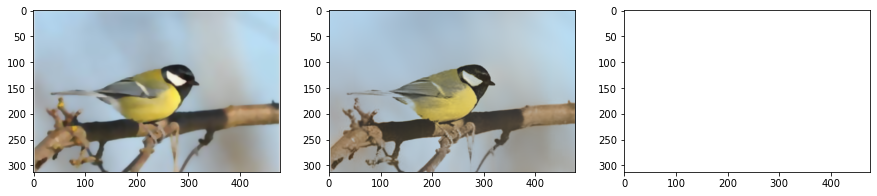

In [14]:

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise

fig, (ax0, ax1, ax2)= plt.subplots(1,3,figsize=(15,15))

ax0.imshow(denoise_tv_chambolle(img, weight=0.1, multichannel=True))
ax1.imshow(denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15,multichannel=True))
ax2.imshow(denoise_wavelet(img, multichannel=True, rescale_sigma=True))


dans cette étape on va ajouter à l'image un bruit de type "s&p" puis on va l'elemine grace à la bibliothéque skimage.restoration

#### la méthode denoise_tv_chambolle

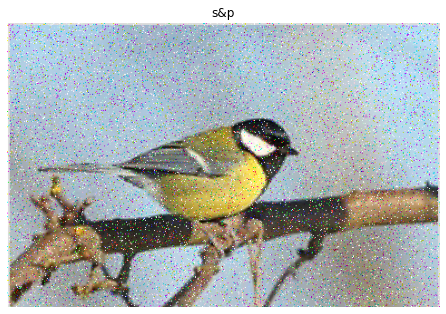

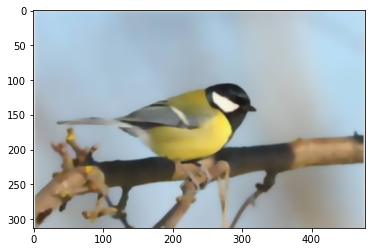

In [42]:
img_path="oiseau.png"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "s&p", r,c,1)
plt.show()
denoised_image = denoise_tv_chambolle(img,weight=0.1,multichannel=True)
plt.imshow(denoised_image)


# <h2 style="color: #d98cb3;" >observations</h2>

aprés avoir ajouter du bruit à l'image puis l'enlever on remarque que l'image devient plus lisse et plus claire que l'image originale .

In [17]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [23]:
%watermark -v -m -p pandas,numpy,cv2,sklearn.cluster,skimage,matplotlib

CPython 3.8.3
IPython 7.16.1

pandas 1.0.5
numpy 1.18.5
cv2 4.4.0
sklearn.cluster 0.23.1
skimage 0.16.2
matplotlib 3.2.2

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores  : 6
interpreter: 64bit
